## 영화 평점 데이터

### 영화 평점 데이터를 활용하여 다음을 실시해보세요

1. 데이터 탐색 : NA 처리

2. 영화별 성별 평점 평균을 산출하여 성별로 상위/하위 10개 영화의 목록 추출 및 도식화 

3. 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화

4. 남녀간 호불호가 큰 영화는?

5. 성별에 관계없이 호불호가 큰 영화는?

In [70]:
import numpy as np

In [99]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

C:\Users\royyk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\royyk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
C:\Users\royyk\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [100]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [101]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data = pd.merge(pd.merge(ratings, users), movies)


In [6]:
data


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [7]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

### 1. 영화별 성별 평점 평균 구하기(상위 10개)

In [8]:
## 방안 1 : pivot table

mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [47]:
## 방법 2 : groupby

mean_ratings1 = data['rating'].groupby([data['title'],data['gender']])

In [48]:
mean_ratings11 = test.mean().unstack()

In [49]:
mean_ratings11

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [50]:
type(mean_ratings11)

pandas.core.frame.DataFrame

In [62]:
mean_ratings11 = mean_ratings.dropna(how='any')

In [71]:
np.bincount(mean_ratings11['F'].isna())

array([3446], dtype=int64)

In [72]:
np.bincount(mean_ratings11['M'].isna())

array([3446], dtype=int64)

### 1.1 성별 평점평균 상위/하위 10개 영화

In [76]:
# female
female_pref_top = mean_ratings11.sort_values('F', ascending=False)[:10]

In [77]:
female_pref_top

gender,F,M
title,,
Coldblooded (1995),5.0,3.588235
"Gate of Heavenly Peace, The (1995)",5.0,5.000000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.0,2.928571
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
"Big Combo, The (1955)",5.0,3.600000
Country Life (1994),5.0,2.000000
Lamerica (1994),5.0,4.666667
24 7: Twenty Four Seven (1997),5.0,3.750000
Raw Deal (1948),5.0,3.307692


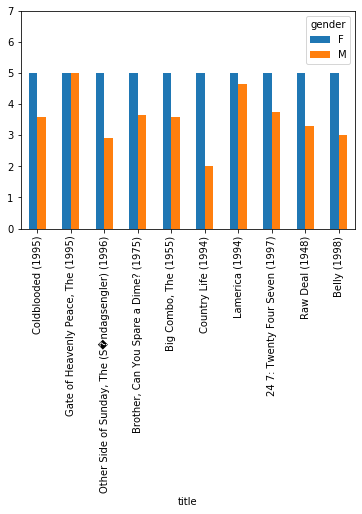

In [97]:
female_pref_top.plot.bar(stacked=False, ylim = (0,7))

In [81]:
# female
female_pref_bottom = mean_ratings11.sort_values('F', ascending=False)[-10:]

In [82]:
female_pref_bottom

gender,F,M
title,,
"Sixth Man, The (1997)",1.0,2.647059
Spring Fever USA (a.k.a. Lauderdale) (1989),1.0,1.000000
Parasite (1982),1.0,2.500000
Power 98 (1995),1.0,2.200000
Big Bully (1996),1.0,2.000000
Meet Wally Sparks (1997),1.0,2.409091
"Enfer, L' (1994)",1.0,3.750000
Stalingrad (1993),1.0,3.593750
Carnosaur 3: Primal Species (1996),1.0,1.066667


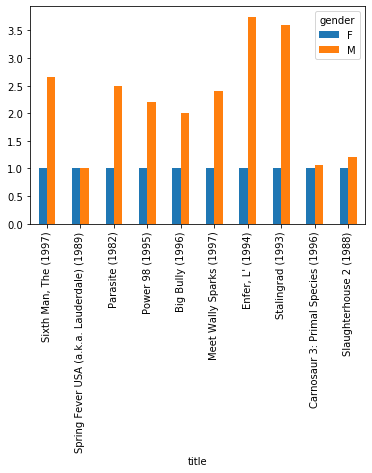

In [83]:
female_pref_bottom.plot.bar(stacked=False)

### 2. 300건 이상의 평점 정보가 있는 영화만 포함

In [85]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [86]:
active_titles = ratings_by_title.index[ratings_by_title >= 300]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '20,000 Leagues Under the Sea (1954)',
       '2001: A Space Odyssey (1968)', '2010 (1984)', '28 Days (2000)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1058)

In [87]:
mean_ratings300 = mean_ratings11.loc[active_titles]

In [88]:
mean_ratings300

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [90]:
top_female_ratings = mean_ratings300.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248


### 3. 남녀간 호불호가 큰 영화 조사

In [91]:
mean_ratings300['diff'] = mean_ratings300['M'] - mean_ratings300['F']

In [92]:
mean_ratings300.head()

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024


In [93]:
sorted_by_diff = mean_ratings300.sort_values('diff')

In [95]:
sorted_by_diff[-10:]

gender,F,M,diff
title,,,
Porky's (1981),2.296875,2.836364,0.539489
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


### 4. 성별에 관계없이 호불호가 큰 영화 조사

In [96]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                           1.321333
Blair Witch Project, The (1999)                1.316368
Natural Born Killers (1994)                    1.307198
Tank Girl (1995)                               1.277695
Rocky Horror Picture Show, The (1975)          1.260177
Eyes Wide Shut (1999)                          1.259624
Billy Madison (1995)                           1.249970
Bicentennial Man (1999)                        1.245533
Babe: Pig in the City (1998)                   1.239379
South Park: Bigger, Longer and Uncut (1999)    1.235380
Name: rating, dtype: float64